In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
import matplotlib.pyplot as plt

In [2]:
path = os.path.dirname(os.path.abspath('__file__'))+'\\Prepared_tables\\'
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures\\'
df_sites = pd.read_csv(path + 'Prep_STYsites_cut0_mito.csv', low_memory=False)
df_prot = pd.read_csv(path + 'Prep_Protein Groups_cut0_notimuted_mito.csv', low_memory=False).sort_values(by=['Gene names']).reset_index(drop=True)
df_prot['SubMitoLocalization'] = df_prot['SubMitoLocalization'].astype(str)

Protein: (MOM:  85 ;IMS:  37 ;MIM:  290 ;Matrx:  426 )
Phospho Protein: (MOM:  45 ;IMS:  5 ;MIM:  43 ;Matrx:  29 )
Phosphosites: (MOM:  119 ;IMS:  7 ;MIM:  62 ;Matrx:  50 )
198


C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)


Protein: (MOM:  75 ;IMS:  34 ;MIM:  291 ;Matrx:  443 )
Phospho Protein: (MOM:  29 ;IMS:  7 ;MIM:  63 ;Matrx:  64 )
Phosphosites: (MOM:  58 ;IMS:  8 ;MIM:  105 ;Matrx:  102 )
177
Protein: (MOM:  68 ;IMS:  33 ;MIM:  275 ;Matrx:  420 )
Phospho Protein: (MOM:  32 ;IMS:  4 ;MIM:  84 ;Matrx:  55 )
Phosphosites: (MOM:  58 ;IMS:  4 ;MIM:  161 ;Matrx:  90 )
193


C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)


Protein: (MOM:  81 ;IMS:  37 ;MIM:  309 ;Matrx:  466 )
Phospho Protein: (MOM:  33 ;IMS:  12 ;MIM:  84 ;Matrx:  81 )
Phosphosites: (MOM:  76 ;IMS:  14 ;MIM:  140 ;Matrx:  119 )
238
Protein: (MOM:  74 ;IMS:  32 ;MIM:  282 ;Matrx:  439 )
Phospho Protein: (MOM:  34 ;IMS:  10 ;MIM:  61 ;Matrx:  78 )
Phosphosites: (MOM:  91 ;IMS:  15 ;MIM:  90 ;Matrx:  122 )
209


C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)


Protein: (MOM:  81 ;IMS:  38 ;MIM:  284 ;Matrx:  463 )
Phospho Protein: (MOM:  31 ;IMS:  7 ;MIM:  19 ;Matrx:  31 )
Phosphosites: (MOM:  54 ;IMS:  9 ;MIM:  24 ;Matrx:  43 )
125
Protein: (MOM:  65 ;IMS:  33 ;MIM:  283 ;Matrx:  421 )
Phospho Protein: (MOM:  26 ;IMS:  8 ;MIM:  96 ;Matrx:  59 )
Phosphosites: (MOM:  53 ;IMS:  11 ;MIM:  200 ;Matrx:  94 )
202


C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\1418596778.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)


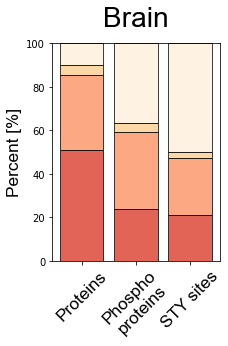

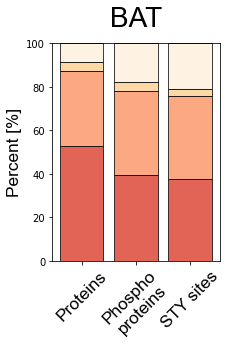

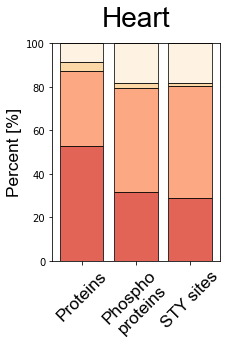

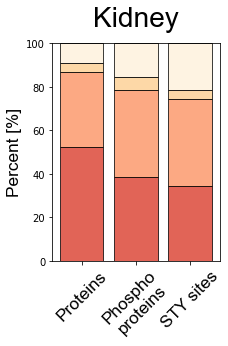

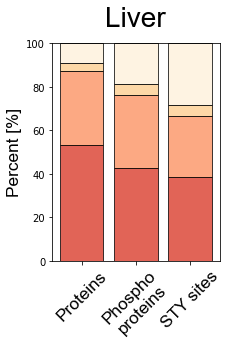

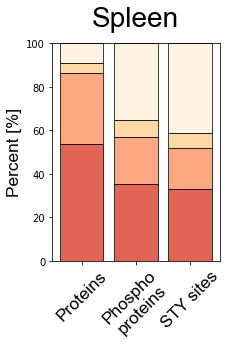

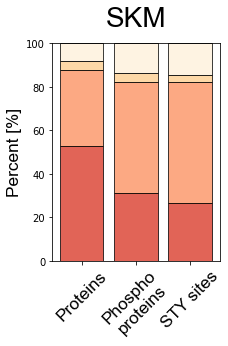

In [3]:
counter = 0
for T in ['B','BAT','H','K','L','S','SKM']:
    
    Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
    
    col = []
    Tab = pd.DataFrame()
    [col.append(i) for i in range(len(list(df_sites.columns))) if ((df_sites.columns[i].find('Intensity wt')==0)&(df_sites.columns[i].find('_'+T)==(len(df_sites.columns[i])-len(T)-1)))==True]
    Tab['Count'] = df_sites.iloc[:,col].count(1)
    Tab['Norm_Int'] = df_sites.iloc[:,col].median(1)
    Tab['SubMitoLocalization'] = df_sites['SubMitoLocalization']
    Tab['IMPI_new'] = df_sites['IMPI_new']
    Tab['Proteins'] = df_sites['Proteins']
 
    
    col = []
    Tab_prot = pd.DataFrame()
    [col.append(i) for i in range(len(list(df_prot.columns))) if df_prot.columns[i].find('Intensity '+T+'_')==0]    
    Tab_prot['Count'] = df_prot.iloc[:,col].count(1)
    Tab_prot['Norm_Int'] = df_prot.iloc[:,col].median(1)
    Tab_prot['SubMitoLocalization'] = df_prot['SubMitoLocalization']
    Tab_prot['IMPI_new'] = df_prot['IMPI_new']
    Tab_prot['Proteins'] = df_prot['Majority protein IDs']
    
    
    
    
    Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
    Matrix = sum([True for i in range(len(Tab)) if 'Matrix' in Tab['SubMitoLocalization'][i]])
    IMS = sum([True for i in range(len(Tab)) if 'IMS' in Tab['SubMitoLocalization'][i]])
    MIM = sum([True for i in range(len(Tab)) if 'MIM' in Tab['SubMitoLocalization'][i]])
    MOM = sum([True for i in range(len(Tab)) if 'MOM' in Tab['SubMitoLocalization'][i]])
    
    Matrix_per= Matrix/(Matrix+IMS+MIM+MOM)*100
    IMS_per= IMS/(Matrix+IMS+MIM+MOM)*100
    MIM_per= MIM/(Matrix+IMS+MIM+MOM)*100
    MOM_per= MOM/(Matrix+IMS+MIM+MOM)*100
    
    #df_dups = pd.DataFrame(Tab.pivot_table(index = ['Proteins'], aggfunc ='size')).reset_index()
    #print(df_dups[0].mean())
    #dups = df_dups.pivot_table(index = [0], aggfunc ='size')
    #print(dups)
    
    Tab_prot = Tab_prot[Tab_prot['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
    prot_Matrix = sum([True for i in range(len(Tab_prot)) if 'Matrix' in Tab_prot['SubMitoLocalization'][i]])
    prot_IMS = sum([True for i in range(len(Tab_prot)) if 'IMS' in Tab_prot['SubMitoLocalization'][i]])
    prot_MIM = sum([True for i in range(len(Tab_prot)) if 'MIM' in Tab_prot['SubMitoLocalization'][i]])
    prot_MOM = sum([True for i in range(len(Tab_prot)) if 'MOM' in Tab_prot['SubMitoLocalization'][i]])
    
    prot_Matrix_per= prot_Matrix/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
    prot_IMS_per= prot_IMS/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
    prot_MIM_per= prot_MIM/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
    prot_MOM_per= prot_MOM/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100

    
    Tab_wo_duplicates = Tab.drop_duplicates(['Proteins']).reset_index(drop=True)
    
    Tab_wo_duplicates = Tab_wo_duplicates[Tab_wo_duplicates['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
    phos_prot_Matrix = sum([True for i in range(len(Tab_wo_duplicates)) if 'Matrix' in Tab_wo_duplicates['SubMitoLocalization'][i]])
    phos_prot_IMS = sum([True for i in range(len(Tab_wo_duplicates)) if 'IMS' in Tab_wo_duplicates['SubMitoLocalization'][i]])
    phos_prot_MIM = sum([True for i in range(len(Tab_wo_duplicates)) if 'MIM' in Tab_wo_duplicates['SubMitoLocalization'][i]])
    phos_prot_MOM = sum([True for i in range(len(Tab_wo_duplicates)) if 'MOM' in Tab_wo_duplicates['SubMitoLocalization'][i]])
    
    phos_prot_MOM_network = [Tab_wo_duplicates['Proteins'][i].split(';')[0] for i in range(len(Tab_wo_duplicates)) if 'MOM' in Tab_wo_duplicates['SubMitoLocalization'][i]]

    
    #print(T)
    
    #print(phos_prot_MOM_network)
    print('Protein: (' 
          'MOM: ', prot_MOM,
          ';IMS: ',prot_IMS,
          ';MIM: ', prot_MIM,
          ';Matrx: ', prot_Matrix, ')')
    
    print('Phospho Protein: (' 
          'MOM: ', phos_prot_MOM,
          ';IMS: ', phos_prot_IMS,
          ';MIM: ', phos_prot_MIM,
          ';Matrx: ', phos_prot_Matrix, ')')
    
    print('Phosphosites: (' 
          'MOM: ', MOM,
          ';IMS: ', IMS,
          ';MIM: ', MIM,
          ';Matrx: ', Matrix, ')')  
    
    print(len(Tab_wo_duplicates))
    
    phos_prot_Matrix_per= phos_prot_Matrix/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
    phos_prot_IMS_per= phos_prot_IMS/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
    phos_prot_MIM_per= phos_prot_MIM/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
    phos_prot_MOM_per= phos_prot_MOM/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100

    fig, ax1 = plt.subplots(figsize=(3, 4))
    Bar_Matrix = np.array([prot_Matrix_per,phos_prot_Matrix_per, Matrix_per])
    Bar_MIM = np.array([prot_MIM_per,phos_prot_MIM_per, MIM_per])
    Bar_IMS = np.array([prot_IMS_per,phos_prot_IMS_per, IMS_per])
    Bar_MOM = np.array([prot_MOM_per,phos_prot_MOM_per, MOM_per])
    Pos = ['Proteins', 'Phosphpproteins','Phosphosites']
    ax1.bar(Pos,Bar_Matrix, color='#d7301f', edgecolor='black', alpha = 0.75)
    ax1.bar(Pos,Bar_MIM, bottom = Bar_Matrix, color='#fc8d59',edgecolor='black', alpha = 0.75)
    ax1.bar(Pos,Bar_IMS, bottom = Bar_Matrix+Bar_MIM, color='#fdcc8a',edgecolor='black', alpha = 0.75)
    ax1.bar(Pos,Bar_MOM, bottom = Bar_Matrix+Bar_MIM+Bar_IMS, color='#fef0d9',edgecolor='black', alpha = 0.75)
    ax1.set_ylabel('Percent [%]',size='xx-large', family='Arial')
    ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)
    ax1.set_ylim([0, 100])
    ax1.set_title(Tissues[counter],size=28, family='Arial',y= 1.05)
    
    plt.savefig(path_saving+'Sup_fig_4\\Localization_1Valid_'+Tissues[counter]+'.pdf', bbox_inches = "tight")
    counter = counter+1
#color= ['#fef0d9','#fdcc8a','#fc8d59','#d7301f']

C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\2624364168.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Annotated\nproteins'],size='xx-large', family='Arial', rotation = 45)


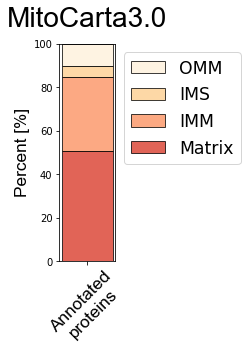

In [4]:
fig, ax1 = plt.subplots(figsize=(1.0, 4))
Bar_Matrix = 528/1042*100
Bar_IMS = 52/1042*100
Bar_MIM =354/1042*100
Bar_MOM = 108/1042*100
Pos = ['Annotated\nproteins']
ax1.bar(Pos,Bar_Matrix, color='#d7301f', edgecolor='black', alpha = 0.75, label= 'Matrix')
ax1.bar(Pos,Bar_MIM, bottom = Bar_Matrix, color='#fc8d59',edgecolor='black', alpha = 0.75,label= 'MIM')
ax1.bar(Pos,Bar_IMS, bottom = Bar_Matrix+Bar_MIM, color='#fdcc8a',edgecolor='black', alpha = 0.75, label= 'IMS')
ax1.bar(Pos,Bar_MOM, bottom = Bar_Matrix+Bar_MIM+Bar_IMS, color='#fef0d9',edgecolor='black', alpha = 0.75, label= 'MOM')
ax1.set_ylabel('Percent [%]',size='xx-large', family='Arial')
ax1.set_xticklabels(['Annotated\nproteins'],size='xx-large', family='Arial', rotation = 45)
ax1.set_ylim([0, 100])
ax1.set_title('MitoCarta3.0',size=28, family='Arial',y= 1.05)
#ax1.legend(['Matrix', 'MIM', 'IMS', 'MOM'])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1, 1),fontsize='xx-large')
ax1.legend(handles[::-1],['OMM','IMS','IMM','Matrix'] ,bbox_to_anchor=(1, 1),fontsize='xx-large')
plt.savefig(path_saving+'Figure_6\\Localization_MitoCharta.pdf', bbox_inches = "tight")

In [5]:
#col = []
#xx = [i for i in range(len(list(df_sites.columns))) if ((df_sites.columns[i].find('Intensity wt')==0)&('___' not in df_sites.columns[i] ))]
#len(xx)  

In [6]:
#len([col.append(i) for i in range(len(list(df_prot.columns))) if df_prot.columns[i].find('Intensity ')==0]  )

SKM
['Q6PCP5', 'P59017', 'Q9CZW5', 'Q3UJU9', 'Q4KMM3', 'Q91Z78', 'A0A5F8MP96', 'Q8BK03', 'Q60932-2', 'Q4KMM3', 'A0A1B0GT26', 'Q9DCC8', 'D3YTP3', 'A0A5H1ZRL1', 'G3UX26', 'Q8BK03', 'Q60932-2', 'E9PUD2', 'Q9D5T0', 'O08715', 'G3UX26', 'Q8VCF0', 'A0A5H1ZRL1', 'Q3UJU9', 'Q6PCP5', 'A0A5H1ZRL1', 'Q8BGV8', 'Q3U9H3', 'Q9D0L7', 'E9Q4Z2', 'B1ART2', 'Q8BGH2', 'B1ART2', 'Q9CQX2', 'Q9CPQ3', 'Q9DB70', 'Q9CRD0', 'Q9D6K8', 'Q9CQS4', 'Q9CRD0', 'G3UX26', 'O08715', 'Q924X2', 'Q9CPQ3', 'Q3U9H3', 'Q9QYA2', 'P41216', 'Q924X2', 'O88845', 'Q9CQ92', 'Q922Q1', 'Q9DCN2', 'Q60931', 'E9PVN6', 'Q6PCP5', 'Q6PCP5', 'Q8BHS6', 'Q8VCM5', 'Q4KMM3', 'O08715', 'Q9CYG7', 'Q5NCS9', 'O88845', 'Q8BX10', 'Q922Q1']
Protein: (MOM:  97 ;IMS:  44 ;MIM:  328 ;Matrx:  494 )
Phospho Protein: (MOM:  65 ;IMS:  21 ;MIM:  138 ;Matrx:  133 )
Phosphosites: (MOM:  173 ;IMS:  32 ;MIM:  285 ;Matrx:  238 )


C:\Users\fhansen\AppData\Local\Temp\ipykernel_19240\267852578.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)


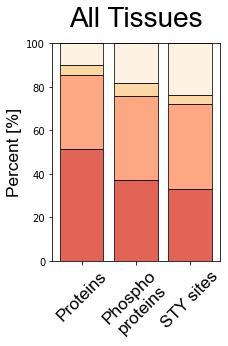

In [7]:


Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']

col = []
Tab = pd.DataFrame()
[col.append(i) for i in range(len(list(df_sites.columns))) if ((df_sites.columns[i].find('Intensity wt')==0)&('___' not in df_sites.columns[i] ))]
#[col.append(i) for i in range(len(list(df_sites.columns))) if ((df_sites.columns[i].find('Intensity wt')==0)&(df_sites.columns[i].find('_'+T)==(len(df_sites.columns[i])-len(T)-1)))==True]
Tab['Count'] = df_sites.iloc[:,col].count(1)
Tab['Norm_Int'] = df_sites.iloc[:,col].median(1)
Tab['SubMitoLocalization'] = df_sites['SubMitoLocalization']
Tab['IMPI_new'] = df_sites['IMPI_new']
Tab['Proteins'] = df_sites['Proteins']


col = []
Tab_prot = pd.DataFrame()
[col.append(i) for i in range(len(list(df_prot.columns))) if df_prot.columns[i].find('Intensity ')==0]
#[col.append(i) for i in range(len(list(df_prot.columns))) if df_prot.columns[i].find('Intensity '+T+'_')==0]    
Tab_prot['Count'] = df_prot.iloc[:,col].count(1)
Tab_prot['Norm_Int'] = df_prot.iloc[:,col].median(1)
Tab_prot['SubMitoLocalization'] = df_prot['SubMitoLocalization']
Tab_prot['IMPI_new'] = df_prot['IMPI_new']
Tab_prot['Proteins'] = df_prot['Majority protein IDs']




Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
Matrix = sum([True for i in range(len(Tab)) if 'Matrix' in Tab['SubMitoLocalization'][i]])
IMS = sum([True for i in range(len(Tab)) if 'IMS' in Tab['SubMitoLocalization'][i]])
MIM = sum([True for i in range(len(Tab)) if 'MIM' in Tab['SubMitoLocalization'][i]])
MOM = sum([True for i in range(len(Tab)) if 'MOM' in Tab['SubMitoLocalization'][i]])

Matrix_per= Matrix/(Matrix+IMS+MIM+MOM)*100
IMS_per= IMS/(Matrix+IMS+MIM+MOM)*100
MIM_per= MIM/(Matrix+IMS+MIM+MOM)*100
MOM_per= MOM/(Matrix+IMS+MIM+MOM)*100

#df_dups = pd.DataFrame(Tab.pivot_table(index = ['Proteins'], aggfunc ='size')).reset_index()
#print(df_dups[0].mean())
#dups = df_dups.pivot_table(index = [0], aggfunc ='size')
#print(dups)

Tab_prot = Tab_prot[Tab_prot['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
prot_Matrix = sum([True for i in range(len(Tab_prot)) if 'Matrix' in Tab_prot['SubMitoLocalization'][i]])
prot_IMS = sum([True for i in range(len(Tab_prot)) if 'IMS' in Tab_prot['SubMitoLocalization'][i]])
prot_MIM = sum([True for i in range(len(Tab_prot)) if 'MIM' in Tab_prot['SubMitoLocalization'][i]])
prot_MOM = sum([True for i in range(len(Tab_prot)) if 'MOM' in Tab_prot['SubMitoLocalization'][i]])

prot_Matrix_per= prot_Matrix/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
prot_IMS_per= prot_IMS/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
prot_MIM_per= prot_MIM/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100
prot_MOM_per= prot_MOM/(prot_Matrix+prot_IMS+prot_MIM+prot_MOM)*100


Tab_wo_duplicates = Tab.drop_duplicates(['Proteins']).reset_index(drop=True)

Tab_wo_duplicates = Tab_wo_duplicates[Tab_wo_duplicates['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
phos_prot_Matrix = sum([True for i in range(len(Tab_wo_duplicates)) if 'Matrix' in Tab_wo_duplicates['SubMitoLocalization'][i]])
phos_prot_IMS = sum([True for i in range(len(Tab_wo_duplicates)) if 'IMS' in Tab_wo_duplicates['SubMitoLocalization'][i]])
phos_prot_MIM = sum([True for i in range(len(Tab_wo_duplicates)) if 'MIM' in Tab_wo_duplicates['SubMitoLocalization'][i]])
phos_prot_MOM = sum([True for i in range(len(Tab_wo_duplicates)) if 'MOM' in Tab_wo_duplicates['SubMitoLocalization'][i]])

phos_prot_MOM_network = [Tab_wo_duplicates['Proteins'][i].split(';')[0] for i in range(len(Tab_wo_duplicates)) if 'MOM' in Tab_wo_duplicates['SubMitoLocalization'][i]]


print(T)

print(phos_prot_MOM_network)
print('Protein: (' 
      'MOM: ', prot_MOM,
      ';IMS: ',prot_IMS,
      ';MIM: ', prot_MIM,
      ';Matrx: ', prot_Matrix, ')')

print('Phospho Protein: (' 
      'MOM: ', phos_prot_MOM,
      ';IMS: ', phos_prot_IMS,
      ';MIM: ', phos_prot_MIM,
      ';Matrx: ', phos_prot_Matrix, ')')

print('Phosphosites: (' 
      'MOM: ', MOM,
      ';IMS: ', IMS,
      ';MIM: ', MIM,
      ';Matrx: ', Matrix, ')')  

#print(len(Tab_wo_duplicates))

phos_prot_Matrix_per= phos_prot_Matrix/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
phos_prot_IMS_per= phos_prot_IMS/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
phos_prot_MIM_per= phos_prot_MIM/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100
phos_prot_MOM_per= phos_prot_MOM/(phos_prot_Matrix+phos_prot_IMS+phos_prot_MIM+phos_prot_MOM)*100

fig, ax1 = plt.subplots(figsize=(3, 4))
Bar_Matrix = np.array([prot_Matrix_per,phos_prot_Matrix_per, Matrix_per])
Bar_MIM = np.array([prot_MIM_per,phos_prot_MIM_per, MIM_per])
Bar_IMS = np.array([prot_IMS_per,phos_prot_IMS_per, IMS_per])
Bar_MOM = np.array([prot_MOM_per,phos_prot_MOM_per, MOM_per])
Pos = ['Proteins', 'Phosphpproteins','Phosphosites']
ax1.bar(Pos,Bar_Matrix, color='#d7301f', edgecolor='black', alpha = 0.75)
ax1.bar(Pos,Bar_MIM, bottom = Bar_Matrix, color='#fc8d59',edgecolor='black', alpha = 0.75)
ax1.bar(Pos,Bar_IMS, bottom = Bar_Matrix+Bar_MIM, color='#fdcc8a',edgecolor='black', alpha = 0.75)
ax1.bar(Pos,Bar_MOM, bottom = Bar_Matrix+Bar_MIM+Bar_IMS, color='#fef0d9',edgecolor='black', alpha = 0.75)
ax1.set_ylabel('Percent [%]',size='xx-large', family='Arial')
ax1.set_xticklabels(['Proteins','Phospho\nproteins','STY sites'],size='xx-large', family='Arial', rotation = 45)
ax1.set_ylim([0, 100])
ax1.set_title('All Tissues',size=28, family='Arial',y= 1.05)

plt.savefig(path_saving+'Figure_6\\Localization_1Valid_all.pdf', bbox_inches = "tight")

